<a href="https://colab.research.google.com/github/lendy0/mcu112/blob/main/Flask_CRUD_0605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

!pip install flask --quiet

!pip install flask-ngrok --quiet

print("Completed!")

In [ ]:
!pip install flask --quiet
!pip install flask-ngrok --quiet
print("Completed!")

Completed!


# Setup and Installation of Ngrok

install ngrok linux version using the following command:

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2023-06-07 10:29:16--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13856790 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.21M  13.7MB/s    in 1.0s    

2023-06-07 10:29:17 (13.7 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13856790/13856790]



extract the downloaded file using the following command:

!tar -xvf /content/ngrok-stable-linux-amd64.tgz

In [ ]:
!tar -xvf /content/ngrok-stable-linux-amd64.tgz

ngrok


The next step is to get your AuthToken from ngrok using this link:

# https://dashboard.ngrok.com/get-started/your-authtoken

paste your AuthToken here and execute this command:

!./ngrok authtoken 1WfN3RWTRByiPHSz9r0*a*b*c*d*e*f*g...39ySgC665zpQp

In [ ]:
!./ngrok authtoken 2QsDRYQP3HzWA0R28YyBnZmj2nI_3tAsSgyAPmf1a8t1Zvf5r

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


# Flask 範例

```python
# import Flask from flask module
from flask import Flask

# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok

app = Flask(__name__) #app name
run_with_ngrok(app)

@app.route("/")
def hello():
    return "<Title>lendy</Title><h1>hello world</h1>"

if __name__ == "__main__":
    app.run()

```

In [ ]:
# import Flask from flask module
from flask import Flask

# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok

app = Flask(__name__) #app name
run_with_ngrok(app)

@app.route("/")
def hello():
    return "<Title>lendy</Title><h1>hello world</h1>"

if __name__ == "__main__":
    app.run()

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Nus3zpMLMhI9TKZ324e4aw.jpeg)

# 關聯(關係)式資料庫

資料表( Table )是資料庫( Database )中存放資料( Data )和資料與資料之間關係( Relationship )的集合。

一個資料庫裡面通常都包含多個表，如學生的表、班級的表、課程的表...等等，表裡面存放資料，如學生的表裡面存放學生的資料、班級的表裡面存放班級的資料、課程的表裡面存放課程的資料...等等。為了能找到表中的資料，表裡面的每筆紀錄往往都會分配唯一的 ID，即所謂的主鍵( Primary Key)，藉此找到每筆紀錄。

外鍵( Foreign Key )是用來建立資料表之間的關係，其外鍵內含值必須要與另一個資料表的主鍵相同。即表和表之間的關聯是通過外鍵。

# DB-API
Python 應用程式如果要連結到資料庫，如 MySQL、SQL Server、PostgreSQL 亦或是 SQLite，因為 Python 定義了一套操作資料庫的 API，稱 DB-API，不同的資料庫只需要提供符合 DB-API 的資料庫驅動程式( Driver )，各種各樣的資料庫系統，就能有一致的操作介面，也就是說，開發者能使用 DB-API，來操作不同資料庫。

DB-API與底層資料庫互動示例：

①程式碼 ⇆ ②使用DB-API ⇆ ③資料庫驅動程式 ⇆ ④底層資料庫(如SQLite、MySQL等)

舉例來說，SQLite 是用C寫的一種體積很小的關聯式資料庫，它的資料庫就是一個檔案，所以經常被整合到應用程式中，在 iOS 和 Android 的 App 中都可以看到。Python 內置了 SQLite3 的驅動程式，所以，在 Python 中使用 SQLite 是不需要再安裝任何東西，就可以直接導入( import )使用，直接操作 SQLite 資料庫。

要操作關聯式資料庫，首先需要建立資料庫連線，一個資料庫的連線稱為一個 Connection。透過資料庫的連線，可以建立游標( Cursor )，通過 Cursor 執行 SQL 語句，然後得到執行結果。


異動資料庫

```python
# 導入 SQLite 驅動程式:
import sqlite3
# 建立資料庫連線
# 資料庫檔案假設是test.db
# 如果資料庫檔案不存在，會自動在當前目錄建立
conn = sqlite3.connect('test.db')
# 透過資料庫的連線建立游標(Cursor)
cursor = conn.cursor()
# 執行"建立 student 資料表"的 SQL
cursor.execute('create table student (id varchar(20) primary key, name varchar(20))')
# <sqlite3.Cursor object at 0x128fab307>
# 繼續執行"新增一筆 student 紀錄"的 SQL 語句
cursor.execute('insert into student (id, name) values (\'1\', \'lendy\')')
# <sqlite3.Cursor object at 0x128fab307>
# 通過 rowcount 獲得新增筆數
print(cursor.rowcount)
# 1
# 提交事務
conn.commit()
# 關閉 Cursor
cursor.close()
# 關閉 Connection
conn.close()
```

查詢記錄

```python
# 導入 SQLite 驅動程式:
import sqlite3
# 建立資料庫連線
# 資料庫檔案假設是test.db
# 如果資料庫檔案不存在，會自動在當前目錄建立
conn = sqlite3.connect('test.db')
# 透過資料庫的連線建立游標(Cursor)
cursor = conn.cursor()
# 執行"查詢 student 資料表"的 SQL
cursor.execute('select * from student where id=?', ('1',))
# <sqlite3.Cursor object at 0x10f8aa340>
# 得到查詢結果
values = cursor.fetchall()
print(values)
# [('1', 'lendy')]
cursor.close()
conn.close()
```

Connection 和 Cursor 使用後一定要記得關閉。

使用 Cursor 執行 insert 、 update 、 delete 語句時，執行結果由 rowcount 返回， 返回值為影響的筆數(行數)。

使用 Cursor 執行 select 時，通過 fetchall() 可以拿到一個 list，每個元素都是一個 tuple，對應一筆記錄。

如果 SQL 語句帶有參數(即?)，可依照參數的位置一個對一個傳遞，例如：

```python
cursor.execute('select * from user where name=? and pwd=?', ('abc', 'password'))
```

SQLite 支持常見的標準 SQL 語句，以及常見的資料類型，相關細節請參閱 SQLite 官方網站。

In [ ]:
# 導入 SQLite 驅動程式:
import sqlite3
# 建立資料庫連線
# 資料庫檔案假設是test.db
# 如果資料庫檔案不存在，會自動在當前目錄建立
conn = sqlite3.connect('test.db')
# 透過資料庫的連線建立游標(Cursor)
cursor = conn.cursor()
# 執行"建立 student 資料表"的 SQL
# cursor.execute('create table student (id varchar(20) primary key, name varchar(20))')
# <sqlite3.Cursor object at 0x128fab307>
# 繼續執行"新增一筆 student 紀錄"的 SQL 語句
cursor.execute('insert into student (id, name) values (\'3\', \'bill\')')
# <sqlite3.Cursor object at 0x128fab307>
# 通過 rowcount 獲得新增筆數
print(cursor.rowcount)
# 1
# 提交事務
conn.commit()
# 關閉 Cursor
cursor.close()
# 關閉 Connection
conn.close()

1


In [ ]:
# 導入 SQLite 驅動程式:
import sqlite3
# 建立資料庫連線
# 資料庫檔案假設是test.db
# 如果資料庫檔案不存在，會自動在當前目錄建立
conn = sqlite3.connect('test.db')
# 透過資料庫的連線建立游標(Cursor)
cursor = conn.cursor()
# 執行"查詢 student 資料表"的 SQL
# cursor.execute('select * from student where id=?', ('1',))
cursor.execute('select * from student')
# <sqlite3.Cursor object at 0x10f8aa340>
# 得到查詢結果
values = cursor.fetchall()
print(values)
# [('1', 'lendy')]
cursor.close()
conn.close()

[('1', 'lendy'), ('2', 'mary'), ('3', 'bill')]


## Python sqlite3 API

|      | API                                                          |
| :--- | :----------------------------------------------------------- |
| 1    | **sqlite3.connect(database [,timeout ,other optional arguments])** 該 API 打開一個到 SQLite 資料庫檔 database 的連結。您可以使用 ":memory:" 來在 RAM 中打開一個到 database 的資料庫連接，而不是在硬碟上打開。如果資料庫成功打開，則返回一個連線物件。當一個資料庫被多個連接訪問，且其中一個修改了資料庫，此時 SQLite 資料庫被鎖定，直到事務提交。timeout 參數表示連接等待鎖定的持續時間，直到發生異常斷開連接。timeout 參數默認是 5.0（5 秒）。如果給定的資料庫名稱 filename 不存在，則該調用將創建一個資料庫。如果您不想在目前的目錄中創建資料庫，那麼您可以指定帶有路徑的檔案名，這樣您就能在任意地方創建資料庫。 |
| 2    | **connection.cursor([cursorClass])** 該常式創建一個 **cursor**，將在 Python 資料庫程式設計中用到。該方法接受一個單一的可選的參數 cursorClass。如果提供了該參數，則它必須是一個擴展自 sqlite3.Cursor 的自訂的 cursor 類。 |
| 3    | **cursor.execute(sql [, optional parameters])** 該常式執行一個 SQL 語句。該 SQL 語句可以被參數化（即使用預留位置代替 SQL 文本）。sqlite3 模組支援兩種類型的預留位置：問號和命名預留位置（命名樣式）。例如：cursor.execute("insert into people values (?, ?)", (who, age)) |
| 9    | **connection.total_changes()** 該常式返回自資料庫連接打開以來被修改、插入或刪除的資料庫總行數。 |
| 10   | **connection.commit()** 該方法提交當前的事務。如果您未調用該方法，那麼自您上一次調用 commit() 以來所做的任何動作對其他資料庫連接來說是不可見的。 |
| 11   | **connection.rollback()** 該方法回滾自上一次調用 commit() 以來對資料庫所做的更改。 |
| 12   | **connection.close()** 該方法關閉資料庫連接。請注意，這不會自動調用 commit()。如果您之前未調用 commit() 方法，就直接關閉資料庫連接，您所做的所有更改將全部丟失！ |
| 13   | **cursor.fetchone()** 該方法獲取查詢結果集中的下一行，返回一個單一的序列，當沒有更多可用的資料時，則返回 None。 |
| 14   | **cursor.fetchmany([size=cursor.arraysize])** 該方法獲取查詢結果集中的下一行組，返回一個列表。當沒有更多的可用的行時，則返回一個空的列表。該方法嘗試獲取由 size 參數指定的盡可能多的行。 |
| 15   | **cursor.fetchall()** 該常式獲取查詢結果集中所有（剩餘）的行，返回一個列表。當沒有可用的行時，則返回一個空的列表。 |



# 範例

https://www.vrsofttech.com/python-flask/flask-with-sqlite-crud-application



# 範例
```python
import sqlite3 as sql

#connect to SQLite
con = sql.connect('db_web.db')

#Create a Connection
cur = con.cursor()

#Drop users table if already exsist.
cur.execute("DROP TABLE IF EXISTS users")

#Create users table  in db_web database
sql ='''CREATE TABLE "users" (
	"UID"	INTEGER PRIMARY KEY AUTOINCREMENT,
	"UNAME"	TEXT,
	"CONTACT"	TEXT
)'''
cur.execute(sql)

#commit changes
con.commit()

#close the connection
con.close()
```

In [ ]:
import sqlite3 as sql

#connect to SQLite
con = sql.connect('db_web.db')

#Create a Connection
cur = con.cursor()

#Drop users table if already exsist.
cur.execute("DROP TABLE IF EXISTS users")

#Create users table  in db_web database
sql ='''CREATE TABLE "users" (
	"UID"	INTEGER PRIMARY KEY AUTOINCREMENT,
	"UNAME"	TEXT,
	"CONTACT"	TEXT
)'''
cur.execute(sql)

#commit changes
con.commit()

#close the connection
con.close()

範例
```python
# import Flask from flask module
from flask import Flask,render_template,request,redirect,url_for,flash
# import sqlite3
import sqlite3 as sql
# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok

app = Flask(__name__) #app name
run_with_ngrok(app)

@app.route("/")
@app.route("/index")
def index():
    con=sql.connect("db_web.db")
    con.row_factory=sql.Row
    cur=con.cursor()
    cur.execute("select * from users")
    data=cur.fetchall()
    # return render_template("index.html",datas=data)
    return render_template("index1.html",datas=data)

@app.route("/add_user",methods=['POST','GET'])
def add_user():
    if request.method=='POST':
        uname=request.form['uname']
        contact=request.form['contact']
        con=sql.connect("db_web.db")
        cur=con.cursor()
        cur.execute("insert into users(UNAME,CONTACT) values (?,?)",(uname,contact))
        con.commit()
        flash('User Added','success')
        return redirect(url_for("index"))
    return render_template("add_user.html")

@app.route("/edit_user/<string:uid>",methods=['POST','GET'])
def edit_user(uid):
    if request.method=='POST':
        uname=request.form['uname']
        contact=request.form['contact']
        con=sql.connect("db_web.db")
        cur=con.cursor()
        cur.execute("update users set UNAME=?,CONTACT=? where UID=?",(uname,contact,uid))
        con.commit()
        flash('User Updated','success')
        return redirect(url_for("index"))
    con=sql.connect("db_web.db")
    con.row_factory=sql.Row
    cur=con.cursor()
    cur.execute("select * from users where UID=?",(uid,))
    data=cur.fetchone()
    return render_template("edit_user.html",datas=data)
    
@app.route("/delete_user/<string:uid>",methods=['GET'])
def delete_user(uid):
    con=sql.connect("db_web.db")
    cur=con.cursor()
    cur.execute("delete from users where UID=?",(uid,))
    con.commit()
    flash('User Deleted','warning')
    return redirect(url_for("index"))
    
if __name__=='__main__':
    app.secret_key='admin123'
    app.run()
```

# 範例步驟

## import

## CRUD(新增:Create , 讀取:Read, 更新: Update, 刪除:Delete)

### Read
```Python
con=sql.connect("db_web.db")
# con.row_factory=sql.Row
cur=con.cursor()
cur.execute("select * from users")
data=cur.fetchall()
data
```

In [ ]:
import sqlite3 as sql

In [ ]:
con=sql.connect("db_web.db")
# con.row_factory=sql.Row
cur=con.cursor()
cur.execute("select * from users")
data=cur.fetchall()
data

[(1, 'lendy', 'lendy.lin@gmail.com')]

### Create
```Python
con=sql.connect("db_web.db")
cur=con.cursor()
cur.execute("insert into users(UNAME,CONTACT) values (?,?)",('lendy','lendy.lin@gmail.com'))
con.commit()
```

In [ ]:
con=sql.connect("db_web.db")
cur=con.cursor()
cur.execute("insert into users(UNAME,CONTACT) values (?,?)",('mary','mary.lu@gmail.com'))
con.commit()

### Update
```python
con=sql.connect("db_web.db")
cur=con.cursor()
cur.execute("update users set UNAME=?,CONTACT=? where UID=?",('bill','bill.chen@gmail.com','1'))
con.commit()
```

In [ ]:
con=sql.connect("db_web.db")
cur=con.cursor()
cur.execute("update users set UNAME=?,CONTACT=? where UID=?",('bill','bill.chen@gmail.com','2'))
con.commit()

### Delete
```python
con=sql.connect("db_web.db")
cur=con.cursor()
cur.execute("delete from users where UID=?",('1',))
con.commit()
```

In [ ]:
con=sql.connect("db_web.db")
cur=con.cursor()
cur.execute("delete from users where UID=?",('2',))
con.commit()

In [ ]:
# import Flask from flask module
from flask import Flask,render_template,request,redirect,url_for,flash
# import sqlite3
import sqlite3 as sql
# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok

app = Flask(__name__) #app name
run_with_ngrok(app)

@app.route("/")
@app.route("/index")
def index():
    con=sql.connect("db_web.db")
    con.row_factory=sql.Row
    cur=con.cursor()
    cur.execute("select * from users")
    data=cur.fetchall()

    return render_template("index.html",datas=data)

@app.route("/add_user",methods=['POST','GET'])
def add_user():
    if request.method=='POST':
        uname=request.form['uname']
        contact=request.form['contact']
        con=sql.connect("db_web.db")
        cur=con.cursor()
        cur.execute("insert into users(UNAME,CONTACT) values (?,?)",(uname,contact))
        con.commit()
        flash('User Added','success')
        return redirect(url_for("index"))
    return render_template("add_user.html")

@app.route("/edit_user/<string:uid>",methods=['POST','GET'])
def edit_user(uid):
    if request.method=='POST':
        uname=request.form['uname']
        contact=request.form['contact']
        con=sql.connect("db_web.db")
        cur=con.cursor()
        cur.execute("update users set UNAME=?,CONTACT=? where UID=?",(uname,contact,uid))
        con.commit()
        flash('User Updated','success')
        return redirect(url_for("index"))
    con=sql.connect("db_web.db")
    con.row_factory=sql.Row
    cur=con.cursor()
    cur.execute("select * from users where UID=?",(uid,))
    data=cur.fetchone()
    return render_template("edit_user.html",datas=data)

@app.route("/delete_user/<string:uid>",methods=['GET'])
def delete_user(uid):
    con=sql.connect("db_web.db")
    cur=con.cursor()
    cur.execute("delete from users where UID=?",(uid,))
    con.commit()
    flash('User Deleted','warning')
    return redirect(url_for("index"))

if __name__=='__main__':
    app.secret_key='admin123'
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://86ef-35-204-189-210.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:01:24] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:01:25] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:01:27] "GET /add_user HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:01:31] "POST /add_user HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:01:31] "GET /index HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:04:36] "GET /add_user HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:04:41] "GET /edit_user/1 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:07:38] "GET /index HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:08:22] "GET /index HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:09:06] "GET /index HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:09:15] "GET /delete_user/4 HTTP/1.1" 302 -
INFO:werkzeug:127.0.0.1 - - [07/Jun/2023 12:09:15] "GET /index HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - -

Jinja（じんじゃ）在日文裡面是「神社」的意思。在這裡是指Python的一個元件庫。

用 Jinja2 做網頁模板

Jinja2樣板語言

Jinja2樣板可以接受任何以文字為基礎的檔案副檔名，例如.html、.xml等。樣板語言，除了顯示普通內容外，還可以顯示變數，同時也有if statement和for迴圈指令。也可以在上面進行標籤、註釋等。

變數

樣板要顯示的變數，可以是一般的變數，也可以是字典（dict）或串列（list）。Jinja2樣板的語法與Python的語法有些不同處，使用上要注意。

串列（list）：Python中的語法是 list_name[num]而在樣板語言則是：{{list_name.0}}

流程控制

可以控制程式流程的選擇、巡迴、傳回等。

if statement 判斷

用來判斷所指定的條件是否滿足，根據判斷的結果決定執行哪一個部分的程式碼。在這個部分Jinja2樣板與Python的敘述類似。

for迴圈

在Jinja2樣板中，可以使用for迴圈來顯示list或者是dict資料。使用方式與Python類似。在語法上要用{% for… %}與{% endfor %}來包裹資料項目。


render_template：實現範本

語法：render_template(“網頁檔案名稱.html”, 參數與區域變數)



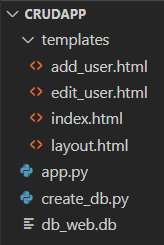

layout.html

```HTML
<html>
  <head>
    <title>Flask - SQLite </title>
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <script src="https://code.jquery.com/jquery-3.2.1.slim.min.js" integrity="sha384-KJ3o2DKtIkvYIK3UENzmM7KCkRr/rE9/Qpg6aAZGJwFDMVNA/GpGFF93hXpG5KkN" crossorigin="anonymous"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.12.9/umd/popper.min.js" integrity="sha384-ApNbgh9B+Y1QKtv3Rn7W3mgPxhU9K/ScQsAP7hUibX39j7fakFPskvXusvfa0b4Q" crossorigin="anonymous"></script>
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>
  </head>
  <body>
    <div class='container pt-3'>
      {% with messages=get_flashed_messages(with_categories=true) %}
        {% if messages %}
          {% for category,message in messages %}
            <div class='alert alert-{{category}}'>{{message}}</div>
          {% endfor %}
        {% endif %}
      {% endwith %}
      {% block body %}
      
      {% endblock %}
    </div>
  </body>
</html>
```

index.html

```HTML
{% extends 'layout.html' %}
{% block body %}
  <h3 class='text-center text-muted mb-3'>Flask - SQLite CRUD Application</h3>
  <p class='text-right'><a href='{{url_for("add_user")}}' class='btn btn-success '>+Add User</a></p>
  <table class='table table-bordered'>
    <thead>
      <th>SNo</th>
      <th>Name</th>
      <th>Contact</th>
      <th>Edit</th>
      <th>Delete</th>
    </thead>
    <tbody>
      {% for row in datas %}
        <tr>
          <td>{{loop.index}}</td>
          <td>{{row.UNAME}}</td>
          <td>{{row.CONTACT}}</td>
          <td><a href='{{url_for("edit_user",uid=row.UID)}}' class='btn btn-primary'>Edit</a></td>
          <td><a href='{{url_for("delete_user",uid=row.UID)}}' class='btn btn-danger' onclick='return confirm("Are You Sure")'>Delete</a></td>
        </tr>
      {%endfor%}
    </tbody>
  </table>
{% endblock %}
```

add_user.html

```HTML
{% extends 'layout.html' %}
{% block body %}
  <div class='row'>
    <div class='col-5 mx-auto'>
      <h3>Add user</h3><hr>
      <form method='post' action='{{url_for("add_user")}}'>
        <div class='form-group'>
          <label>User Name</label>
          <input type='text' name='uname' required class='form-control'>
        </div>
        <div class='form-group'>
          <label>Contact</label>
          <input type='text' name='contact' required class='form-control'>
        </div>
        <input type='submit' value='Submit' class='btn btn-primary'>
      </form>
    
    </div>
  </div>
{% endblock %}
```

edit_user.html

```HTML
{% extends 'layout.html' %}
{% block body %}
  <div class='row'>
    <div class='col-5 mx-auto'>
      <h3>Edit user</h3><hr>
      <form method='post' action='{{url_for("edit_user",uid=datas.UID)}}'>
        <div class='form-group'>
          <label>User Name</label>
          <input type='text' name='uname' required class='form-control' value='{{datas.UNAME}}'>
        </div>
        <div class='form-group'>
          <label>Contact</label>
          <input type='text' name='contact' required class='form-control' value='{{datas.CONTACT}}'>
        </div>
        <input type='submit' value='Submit' class='btn btn-primary'>
      </form>
    </div>
  </div>
{% endblock %}
```

# 爬蟲

```python
import requests

from bs4 import BeautifulSoup

url = 'https://e3d2-35-192-15-49.ngrok-free.app/'

r = requests.get(url);

sp = BeautifulSoup(r.text,'lxml')

tbody = sp.find('tbody')

datas = tbody.find_all('tr')

for tr in datas:
    print(tr.find_all('td')[1].text)
```